<a href="https://colab.research.google.com/github/Aditya757/MyRepository/blob/main/project_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/peta.zip

Archive:  /content/drive/MyDrive/peta.zip
   creating: peta/
   creating: peta/test/
   creating: peta/Train/
   creating: peta/Train/Jacket/
  inflating: peta/Train/Jacket/0008.png  
  inflating: peta/Train/Jacket/0011_006.jpg  
  inflating: peta/Train/Jacket/0011_007.jpg  
  inflating: peta/Train/Jacket/0011_009.jpg  
  inflating: peta/Train/Jacket/0016.png  
  inflating: peta/Train/Jacket/0016_005.jpg  
  inflating: peta/Train/Jacket/0016_006.jpg  
  inflating: peta/Train/Jacket/0017_004.jpg  
  inflating: peta/Train/Jacket/0017_010.jpg  
  inflating: peta/Train/Jacket/0021_005.jpg  
  inflating: peta/Train/Jacket/0021_011.jpg  
  inflating: peta/Train/Jacket/0022_005.jpg  
  inflating: peta/Train/Jacket/0022_006.jpg  
  inflating: peta/Train/Jacket/0024.png  
  inflating: peta/Train/Jacket/0025_001.jpg  
  inflating: peta/Train/Jacket/0025_002.jpg  
  inflating: peta/Train/Jacket/0025_003.jpg  
  inflating: peta/Train/Jacket/0025_006.jpg  
  inflating: peta/Train/Jacket/0026_001.jp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 668.3 MB 379 kB/s
     |████████████████████████████████| 462 kB 29.5 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [5]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [8]:
# re-size all the images to this
IMAGE_SIZE = (224, 224, 3)

train_path = '/content/peta/Train'
valid_path = '/content/peta/Validation'

In [9]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [10]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('/content/peta/Train/*')

In [12]:
folders

['/content/peta/Train/Jacket',
 '/content/peta/Train/Shirt',
 '/content/peta/Train/Shorts',
 '/content/peta/Train/T-Shirt',
 '/content/peta/Train/Short Hair',
 '/content/peta/Train/Long Hair',
 '/content/peta/Train/Pant']

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/peta/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
type(training_set)

Found 901 images belonging to 7 classes.


keras.preprocessing.image.DirectoryIterator

In [22]:
test_set = test_datagen.flow_from_directory('/content/peta/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
type(test_set)

Found 491 images belonging to 7 classes.


keras.preprocessing.image.DirectoryIterator

In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
29/29 [==============================] - 12s 373ms/step - loss: 3.3444 - accuracy: 0.7381 - val_loss: 16.4550 - val_accuracy: 0.2322
Epoch 2/20
29/29 [==============================] - 11s 378ms/step - loss: 2.6708 - accuracy: 0.7703 - val_loss: 14.7720 - val_accuracy: 0.2179
Epoch 3/20
29/29 [==============================] - 11s 377ms/step - loss: 2.6455 - accuracy: 0.7780 - val_loss: 15.9931 - val_accuracy: 0.2138
Epoch 4/20
29/29 [==============================] - 11s 378ms/step - loss: 2.2251 - accuracy: 0.7802 - val_loss: 16.7739 - val_accuracy: 0.2322
Epoch 5/20
29/29 [==============================] - 11s 378ms/step - loss: 2.8266 - accuracy: 0.7858 - val_loss: 13.5180 - val_accuracy: 0.2322
Epoch 6/20
29/29 [==============================] - 11s 376ms/step - loss: 2.1443 - accuracy: 0.7836 - val_loss: 15.8446 - val_accuracy: 0.2485
Epoch 7/20
29/29 [==============================] - 11s 375ms/step - loss: 2.2622 - accuracy: 0.8002 - val_loss: 15.5063 - val_accuracy:

In [24]:
import matplotlib.pyplot as plt

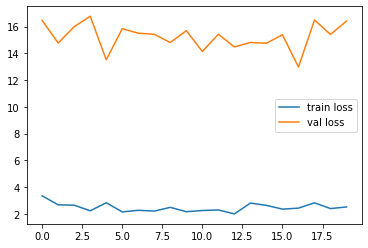

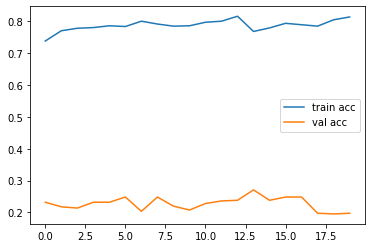

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [27]:
y_pred = model.predict(test_set)


In [28]:
y_pred


array([[1.00000000e+00, 8.67735703e-15, 2.90437027e-13, ...,
        7.57205659e-13, 1.10393349e-17, 2.77088796e-17],
       [4.54378174e-10, 1.13608303e-10, 4.27260020e-05, ...,
        3.12112458e-02, 1.13979149e-04, 9.68632042e-01],
       [8.43830109e-01, 3.85659327e-08, 3.22467735e-04, ...,
        1.55818909e-01, 2.84963644e-05, 1.30102977e-08],
       ...,
       [4.47305116e-13, 1.07436663e-23, 1.00000000e+00, ...,
        2.60256870e-19, 1.10335085e-20, 1.15713945e-10],
       [2.18737290e-12, 5.41465306e-06, 5.73856624e-08, ...,
        7.55385578e-01, 2.26580024e-01, 1.80284679e-02],
       [1.46940889e-04, 1.71973059e-12, 1.10465489e-01, ...,
        1.21442101e-08, 1.40649306e-07, 2.56389648e-01]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred


array([0, 6, 0, 3, 4, 3, 6, 1, 0, 3, 4, 2, 0, 5, 0, 0, 6, 0, 6, 4, 3, 0,
       5, 2, 0, 2, 6, 0, 5, 2, 6, 0, 0, 3, 3, 3, 0, 0, 0, 5, 3, 4, 4, 6,
       6, 0, 6, 4, 0, 5, 5, 0, 2, 2, 0, 0, 5, 5, 0, 0, 6, 3, 0, 5, 6, 3,
       0, 0, 5, 0, 5, 5, 5, 5, 0, 5, 6, 5, 6, 0, 5, 2, 6, 3, 3, 0, 6, 0,
       3, 0, 5, 5, 0, 0, 6, 6, 0, 0, 0, 4, 0, 2, 5, 0, 3, 0, 0, 3, 4, 3,
       0, 0, 0, 4, 0, 6, 5, 4, 0, 5, 3, 3, 5, 0, 4, 6, 4, 3, 2, 5, 0, 0,
       5, 0, 5, 6, 3, 6, 2, 5, 5, 5, 0, 3, 0, 1, 6, 6, 5, 2, 0, 3, 5, 0,
       2, 0, 4, 0, 5, 0, 4, 1, 5, 3, 1, 5, 5, 0, 5, 6, 5, 2, 5, 0, 5, 1,
       0, 5, 0, 6, 5, 0, 1, 3, 0, 4, 3, 4, 5, 5, 3, 5, 0, 6, 0, 5, 0, 0,
       0, 6, 0, 4, 0, 0, 5, 5, 0, 4, 5, 6, 2, 0, 3, 6, 2, 3, 0, 5, 5, 6,
       0, 3, 4, 0, 5, 5, 4, 0, 3, 3, 3, 6, 6, 5, 5, 6, 0, 0, 5, 5, 5, 5,
       0, 3, 2, 0, 2, 5, 3, 4, 0, 3, 0, 0, 0, 5, 0, 5, 5, 2, 0, 0, 5, 3,
       0, 2, 0, 6, 0, 0, 6, 0, 6, 2, 0, 3, 5, 3, 3, 6, 0, 6, 0, 0, 0, 0,
       5, 5, 3, 6, 6, 0, 3, 4, 3, 3, 6, 0, 4, 5, 0,

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('/content/model_inception.h5')

In [73]:
img=image.load_img('/content/young-man-cross-street_158595-870.webp',target_size=(224,224))

In [74]:
x=image.img_to_array(img)
x

array([[[ 38.,  31.,  19.],
        [ 33.,  33.,  21.],
        [ 40.,  36.,  19.],
        ...,
        [117., 124., 138.],
        [119., 124., 136.],
        [130., 132., 145.]],

       [[ 32.,  30.,  17.],
        [ 30.,  29.,  20.],
        [ 40.,  32.,  26.],
        ...,
        [118., 125., 139.],
        [119., 123., 138.],
        [130., 133., 141.]],

       [[ 66.,  63.,  44.],
        [ 44.,  38.,  19.],
        [ 67.,  57.,   8.],
        ...,
        [119., 126., 140.],
        [115., 120., 132.],
        [133., 136., 146.]],

       ...,

       [[ 81.,  83.,  87.],
        [ 71.,  72.,  78.],
        [ 72.,  73.,  79.],
        ...,
        [173., 179., 186.],
        [176., 179., 187.],
        [158., 161., 169.]],

       [[ 99., 100., 104.],
        [ 48.,  50.,  56.],
        [ 53.,  54.,  61.],
        ...,
        [160., 163., 171.],
        [168., 171., 179.],
        [160., 163., 173.]],

       [[ 90.,  96., 100.],
        [ 52.,  55.,  61.],
        [ 65.,  

In [75]:
x.shape

(224, 224, 3)

In [76]:
x=x/255

In [77]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [78]:
val=model.predict(img_data)
val

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [79]:
if val.any()==0:
  print("Jacket")
if val.any()==1:
  print("Long Har")
if val.any()==2:
  print("Pant")
if val.any()==3:
  print("Shirt")
if val.any()==4:
  print("Short Hair")
if val.any()==5:
  print("Shorts")
if val.any()==6:
  print("T-Shirt")

Long Har


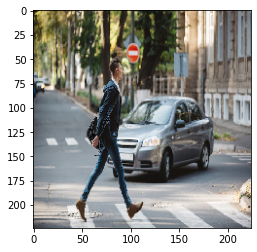

In [80]:
plt.imshow(img)

In [82]:
training_set.class_indices

{'Jacket': 0,
 'Long Hair': 1,
 'Pant': 2,
 'Shirt': 3,
 'Short Hair': 4,
 'Shorts': 5,
 'T-Shirt': 6}